# FIREstars - Far-ultraviolet Irradiated Rotational Evolution model for low mass stars

## Spin Evolution of the neighborhood of massive stars

**Last update (Julia Roquette - 7th September 2021)** The simulations were updated to the parameters suggested by the paper's referee. Initially I used a scaling radius $a=3$ pc, while the referee points out that a more realistic value would be 1-2 pc.

**Previous Updates (Julia Roquette - 5th August 2021)** In this notebook, I have notes of the simulations performed in Section 3.4 of Roquette et al. (2021). These simulations distribute low-mass stars in a [Plummer Sphere (Plummer 1911)](https://ui.adsabs.harvard.edu/abs/1911MNRAS..71..460P/abstract) around massive stars and model their spin-evolution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from FIREstars import FUVfunctions
import FIREstars.SpinEvolution as spinEvol

In the paper, we are giving as examples three massive stars with 80, 26 and 19 M$_\odot$.

In [2]:
mass = [80, 26, 10]

The first step was to quantify and compare their contribution to their local FUV environment. 

In [3]:
dist = np.linspace(0.05, 20, 1000) 

In [4]:
local_fuv = []

In [5]:
for m in mass:
    local_fuv.append([FUVfunctions.Parravano(m).localFUV(x).value for x in dist])

Text(0.5, 0, 'distance (pc)')

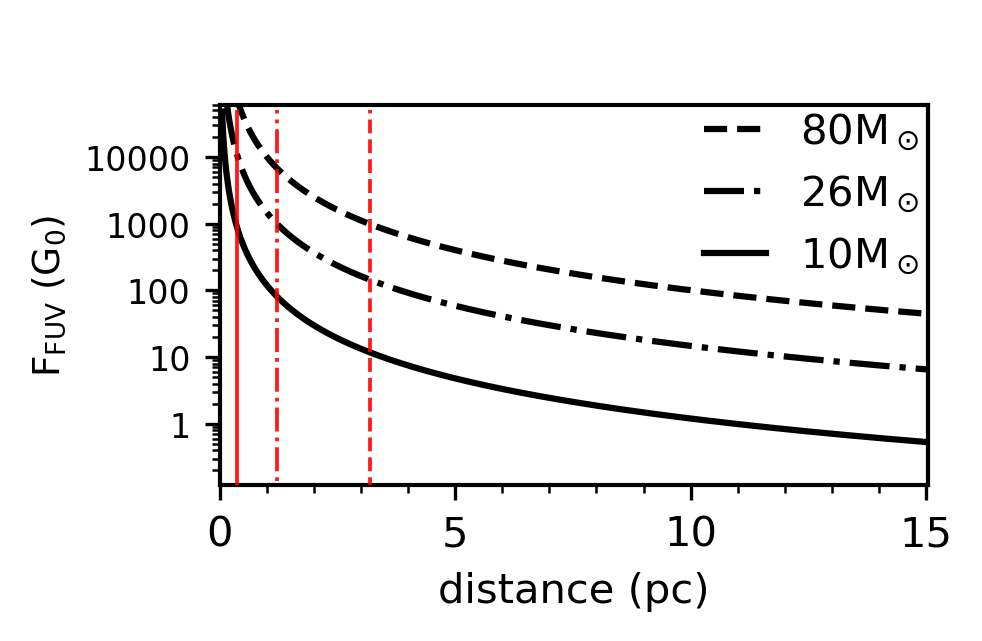

In [6]:
fig= plt.subplots(figsize=(3.15, 2), dpi=300)
plt.subplots_adjust(left=0.22, right=0.97, bottom=0.23, top=0.99)
plt.subplots_adjust(wspace=0, hspace=0)
#ax.set_yticks()

dim = (6, 1)
fs = 10

axr = plt.subplot2grid(dim, (0,0), colspan=1, rowspan=1)
ax = plt.subplot2grid(dim, (1,0), colspan=1, rowspan=5)
ax.set_yscale("log")

y_major = mpl.ticker.LogLocator(base=10.0, numticks=5)
ax.yaxis.set_major_locator(y_major)
y_minor = mpl.ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0)*0.1, 
                                numticks=10)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set_yticks([1, 10, 100, 1000, 10000])
ax.set_yticklabels([1, 10, 100, 1000, 10000], fontsize=fs-2)  
ax.set_xlim(0, 15.05)
ax.set_ylim(0.12, 6e4)
ax.xaxis.set_minor_locator(mpl.ticker.FixedLocator(np.arange(0, 20.0)))

for fuv, ln, lb in zip(local_fuv, ['--', '-.', '-'], 
                       [r'80M$_\odot$', r'26M$_\odot$', r'10M$_\odot$']):
                ax.plot(dist, fuv, ln+'k', label=lb) 
ax.vlines(3.2, 0.05, 5e4, ls='--', lw=0.9, color='r', zorder=10, alpha=0.9)
ax.vlines(1.22, 0.05, 5e4, ls='-.', lw=0.9, color='r', zorder=10, alpha=0.9)
ax.vlines(0.36, 0.05, 5e4, ls='-', lw=0.9, color='r', zorder=10, alpha=0.9)
axr.axes.get_yaxis().set_visible(False)
axr.axes.get_xaxis().set_visible(False)
axr.spines['left'].set_visible(False)
axr.spines['right'].set_visible(False)
axr.spines['bottom'].set_visible(False)
axr.spines['top'].set_visible(False)
axr.set_xlim(0, 15.05)
for ix in ['top', 'bottom', 'left', 'right']:
    ax.spines[ix].set_linewidth(1)

leg= ax.legend(handlelength=1.5, bbox_to_anchor=(0.63, 0.45), fontsize=fs,
               ncol=1)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_facecolor('none')

ax.set_ylabel(r'F$_\mathrm{FUV}$ (G$_0$)', fontsize=fs-1)
ax.set_xlabel(r'distance (pc)', fontsize=fs)

We make this comparison in the plot above, where we also show vertical red lines marking the position at which each massive star contribute to their local FUV in 1,000 G$_0$.

### Plummer Sphere

Next, I use a Plummer Sphere to distribute stars around each massive star. 

The Plummer 3D density profile is:

$\rho(r)=\frac{3M_0}{4\pi a^3}\big(1+\frac{r^2}{a^2}\big)^{-\frac{5}{2}}$

Where $M_0$ is the total mass of the N-body system and $a$ is a scaling radius.


This density law can be used to estimate the cumulative distribution of mass, which is done by integrating the density profile in spherical coordinates.

$\int^{2\pi}_0\int^{\pi}_0\int^{r}_0\rho(r)r^2\sin\theta drd\phi d\theta = 4\pi \int^{r}_0\rho(r)r^2dr$

$m(r)=M_0\big(\frac{r}{a}\big)^3\Big(\frac{r^2}{a^2}+1\Big)^{-\frac{3}{2}}$

which is easily re-arranged to:

$m(r)=M_0\Big(1+\frac{a^2}{r^2}\Big)^{-\frac{3}{2}}$.

This cumulative distribution can be inverted to give the radius at which a certain fractional mass is contained:

$r(m)=a\Big(\big(\frac{m}{M_0}\big)^{-\frac{2}{3}}-1\Big)^{-\frac{1}{2}}$

In Roquette et al. 2021, I am not yet looking at the IMF of clusters (this will be done in the subsequent paper). Instead, for now, I am looking at distributions of stars that have the same mass. So instead of total mass, I use the total number of sources, $N$. Similarly, instead of looking at the radius containing a fractional mass, $r(m)$, we will look at the position of the n-th source, $r(n)$. Inside this framework, we can re-write the three equations as:

1. Density of sources: $\rho(r)=\frac{3N}{4\pi a^3}\big(1+\frac{r^2}{a^2}\big)^{-\frac{5}{2}}$

2. cumulative distribution of sources: $n(r)=N\Big(1+\frac{a^2}{r^2}\Big)^{-\frac{3}{2}}$.

3. position of the n-th source: $r(n)=a\Big(\big(\frac{n}{N}\big)^{-\frac{2}{3}}-1\Big)^{-\frac{1}{2}}$






Equation 3. will be directly used in the simulations, and it is necessary to write it as a python function:

In [7]:
r = lambda n, a, N: a*((n/N)**(-2./3)-1)**(-1./2)

So far, the free parameters involved are the scalling radius $a$ and the total number of sources $N$. However, it is interesting to parametrise things in terms of the density of sources at the center of the Plummer Sphere, $\rho_0$. With equation 1.:

$\rho(0)=\frac{3\times1}{4\pi a^3}\big(1+\frac{0^2}{a^2}\big)^{-\frac{5}{2}}=\rho_0$,

which can be re-arranged to:

4. $N=\frac{4\pi}{3}a^3\rho_0$

In [8]:
N_ = lambda rho0, a : int((4.*np.pi*rho0*a**3)/3)

In the paper, I initially adopted a central density of sources of 10 sources per pc$^3$ along with a scalling radius of 3 pc. After the referee comments, I changed this value to 1.5 pc.

In [72]:
rho0 = 100.
a = 1.5

Which sets the number of sources in my Plummer sphere to:

In [73]:
N = N_(rho0, a)
print(N)

1413


We can now calculate the distribution of sources:

In [74]:
distances = r(np.linspace(1, N, N), a, N)
print(distances.shape)
print('distances between {0} and {1} pc'.format(distances.min(), distances.max()))

(1413,)
distances between 0.13420702249882394 and inf pc


<ipython-input-7-b0510b77b51f>:1: RuntimeWarning: divide by zero encountered in power
  r = lambda n, a, N: a*((n/N)**(-2./3)-1)**(-1./2)


Text(0, 0.5, '# of sources')

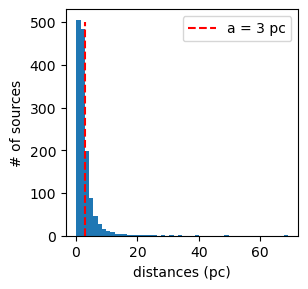

In [75]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=100)
a = ax.hist(distances[:-1], bins=50)
ax.vlines(3, 0, 500, colors='red', linestyles='dashed', label='a = 3 pc')
ax.legend()
ax.set_xlabel('distances (pc)')
ax.set_ylabel('# of sources')

Note that from the definition of the Plummer Sphere, the sources are distributed until infinity. Hence, in my case, it is helpful to truncate it at some shorter radius.

In [85]:
distances = distances[distances < 15.]
print('distances below 15 pc', distances.shape)

distances below 15 pc (1392,)


The plot below is Figure 6 in the paper. It shows this distribution as a rug-plot on the top of the plot comparing the influence of the three massive stars to their FUV-environment.

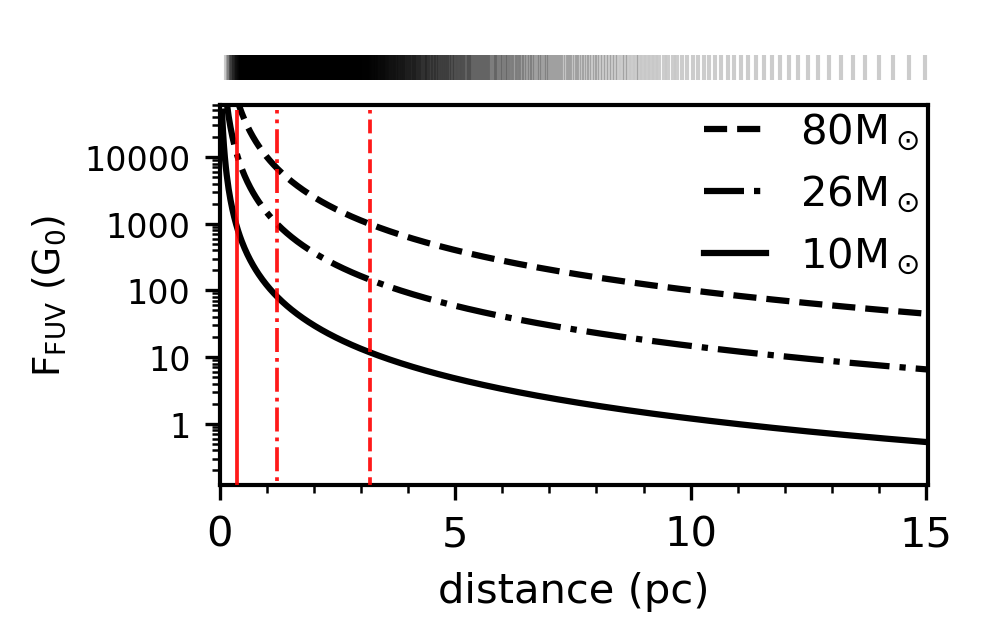

In [62]:
fig= plt.subplots(figsize=(3.15, 2), dpi=300)
plt.subplots_adjust(left=0.22, right=0.97, bottom=0.23, top=0.99)
plt.subplots_adjust(wspace=0, hspace=0)

dim = (6, 1)
fs = 10

axr = plt.subplot2grid(dim, (0,0), colspan=1, rowspan=1)
ax = plt.subplot2grid(dim, (1,0), colspan=1, rowspan=5)
ax.set_yscale("log")

y_major = mpl.ticker.LogLocator(base=10.0, numticks=5)
ax.yaxis.set_major_locator(y_major)
y_minor = mpl.ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0)*0.1, 
                                numticks=10)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set_yticks([1, 10, 100, 1000, 10000])
ax.set_yticklabels([1, 10, 100, 1000, 10000], fontsize=fs-2)  
ax.set_xlim(0, 15.05)
ax.set_ylim(0.12, 6e4)
ax.xaxis.set_minor_locator(mpl.ticker.FixedLocator(np.arange(0, 20.0)))

for fuv, ln, lb in zip(local_fuv, ['--', '-.', '-'], 
                       [r'80M$_\odot$', r'26M$_\odot$', r'10M$_\odot$']):
                ax.plot(dist, fuv, ln+'k', label=lb) 
ax.vlines(3.2, 0.05, 5e4, ls='--', lw=0.9, color='r', zorder=10, alpha=0.9)
ax.vlines(1.22, 0.05, 5e4, ls='-.', lw=0.9, color='r', zorder=10, alpha=0.9)
ax.vlines(0.36, 0.05, 5e4, ls='-', lw=0.9, color='r', zorder=10, alpha=0.9)


#ax.fill_betweenx([0,1e5], 0.288, 5, color='lightgray')
    
axr.axes.get_yaxis().set_visible(False)
axr.axes.get_xaxis().set_visible(False)
axr.spines['left'].set_visible(False)
axr.spines['right'].set_visible(False)
axr.spines['bottom'].set_visible(False)
axr.spines['top'].set_visible(False)
axr.plot( distances, np.full(len(distances), 1), 'k|', alpha=0.2)
axr.set_xlim(0, 15.05)
for ix in ['top', 'bottom', 'left', 'right']:
    ax.spines[ix].set_linewidth(1)

leg= ax.legend(handlelength=1.5, bbox_to_anchor=(0.63, 0.45), fontsize=fs, ncol=1)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_facecolor('none')
ax.set_ylabel(r'F$_\mathrm{FUV}$ (G$_0$)', fontsize=fs-1)
ax.set_xlabel(r'distance (pc)', fontsize=fs)
mydir = '/Users/jroquette/work/plot/'
plt.savefig(mydir + 'MassiveStars_FUVvsDist_80_26_10Mo_withrug_Plumme_refereed.pdf')

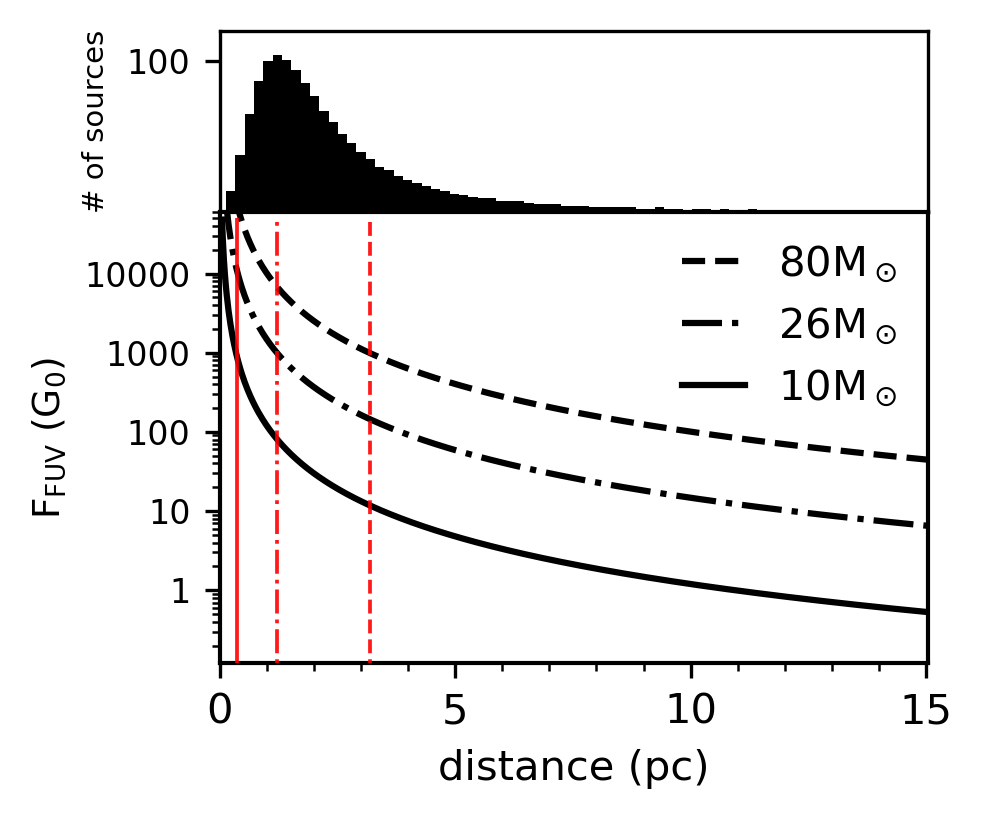

In [77]:
fig= plt.subplots(figsize=(3.15, 2.6), dpi=300)
plt.subplots_adjust(left=0.22, right=0.97, bottom=0.18, top=0.99)
plt.subplots_adjust(wspace=0, hspace=0)

dim = (7, 1)
fs = 10

axr = plt.subplot2grid(dim, (0,0), colspan=1, rowspan=2)
ax = plt.subplot2grid(dim, (2,0), colspan=1, rowspan=5)
ax.set_yscale("log")

y_major = mpl.ticker.LogLocator(base=10.0, numticks=5)
ax.yaxis.set_major_locator(y_major)
y_minor = mpl.ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0)*0.1, 
                                numticks=10)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set_yticks([1, 10, 100, 1000, 10000])
ax.set_yticklabels([1, 10, 100, 1000, 10000], fontsize=fs-2)  
ax.set_xlim(0, 15.05)
ax.set_ylim(0.12, 6e4)
ax.xaxis.set_minor_locator(mpl.ticker.FixedLocator(np.arange(0, 20.0)))

for fuv, ln, lb in zip(local_fuv, ['--', '-.', '-'], 
                       [r'80M$_\odot$', r'26M$_\odot$', r'10M$_\odot$']):
                ax.plot(dist, fuv, ln+'k', label=lb) 
ax.vlines(3.2, 0.05, 5e4, ls='--', lw=0.9, color='r', zorder=10, alpha=0.9)
ax.vlines(1.22, 0.05, 5e4, ls='-.', lw=0.9, color='r', zorder=10, alpha=0.9)
ax.vlines(0.36, 0.05, 5e4, ls='-', lw=0.9, color='r', zorder=10, alpha=0.9)

axr.axes.get_xaxis().set_visible(False)
axr.hist(distances, bins=75, color='k')
axr.set_xlim(0, 15.05)
axr.set_yticks([100])
axr.set_yticklabels([100], fontsize=fs-2)  
axr.set_ylim(0,120)
axr.set_ylabel('# of sources', fontsize=fs-3)
for ix in ['top', 'bottom', 'left', 'right']:
    ax.spines[ix].set_linewidth(1)

leg= ax.legend(handlelength=1.5, bbox_to_anchor=(0.6, 0.48), fontsize=fs, ncol=1)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_facecolor('none')
ax.set_ylabel(r'F$_\mathrm{FUV}$ (G$_0$)', fontsize=fs-1)
ax.set_xlabel(r'distance (pc)', fontsize=fs)
mydir = '/Users/jroquette/work/plot/'
plt.savefig(mydir + 'MassiveStars_FUVvsDist_80_26_10Mo_withhist_Plumme_refereed.pdf')

Finally, I can now estimate the FUV-flux at each position in this distribution, considering the cases with each of the three massive stars in the centre of the Plummer sphere. The printed outputs give information on the ranges of FUV-fluxes being dealt with.

In [86]:
#estimate FUV fluxes at each distance
local_FUV = []
for m in mass:
    local_FUV.append([FUVfunctions.Parravano(m).localFUV(x).value 
                      for x in distances])
    print(r'FUV range for a stars with {0} M$_\odot$: {1} - {2} G$_0$'.format(
             m, np.nanmin(np.log10(np.array(local_FUV[-1]))), 
              np.nanmax(np.log10(np.array(local_FUV[-1])))))
    print(r'FUV range for a stars with {0} M$_\odot$: {1} - {2} G$_0$ - median: {3}'.format(
             m, np.nanmin(np.array(local_FUV[-1])), 
              np.nanmax(np.array(local_FUV[-1])), np.nanmedian(np.array(local_FUV[-1]))) ) 
    

FUV range for a stars with 80 M$_\odot$: 1.651934944615072 - 5.747164255505799 G$_0$
FUV range for a stars with 80 M$_\odot$: 44.86781749007321 - 558681.4549700784 G$_0$ - median: 2694.834677351197
FUV range for a stars with 26 M$_\odot$: 0.8171565563164856 - 4.912385867207213 G$_0$
FUV range for a stars with 26 M$_\odot$: 6.563818389687187 - 81730.8220735524 G$_0$ - median: 394.2336935884613
FUV range for a stars with 10 M$_\odot$: -0.2722693532609934 - 3.822959957629734 G$_0$
FUV range for a stars with 10 M$_\odot$: 0.534232920666463 - 6652.1182020250535 G$_0$ - median: 32.08690506760476


It follows some definitions required for the simulations. I want to look at how different the spin evolution of stars located at each of these positions is, and I want to do that as a function of stellar mass. For that, I consider low mass stars in the interval 0.1-1.3 M$_\odot$ in spets of 0.1 M$_\odot$, and for each of these stellar masses, I will run spin evolution models for a fast initial rotation of 1.6 d and a slow initial rotation of 16 d, while constraining the disk-locking duration using the stellar masses and local-FUV fluxes.

In [65]:
# Lower mass sampling
dm = .1
lower_mass = np.linspace(0.1, 1.3, int((1.3 - 0.1)/dm)+1)

#fast and slow initial rotation
fast_initial = 1.6
slow_initial = 16.

fast_output = np.full((len(mass), len(lower_mass), len(distances), 3), np.nan)
slow_output = np.full((len(mass), len(lower_mass), len(distances), 3), np.nan)
print('output shae', slow_output.shape)

output shae (3, 12, 1392, 3)


In [66]:
# estimating disk lifetimes
disk = FUVfunctions.DiskWithFUV()
tau_d = np.full((len(mass), len(lower_mass), len(distances)), np.nan)
local_FUV_ = np.full((len(mass), len(lower_mass), len(distances)), np.nan)

for i in range(len(mass)):
    for j, m in enumerate(lower_mass):
        for k, fuv in enumerate(local_FUV[i]):
            tau_d[i, j, k] = disk.get_tauD(m, fuv)

In [52]:
mass_ = np.full((len(mass), len(lower_mass), len(distances)), np.nan)
for i in range(len(mass)):
    for j, m in enumerate(lower_mass):
        for k, fuv in enumerate(local_FUV[i]):
            local_FUV_[i, j, k] = fuv
            mass_[i, j, k] = m
print(mass_.shape)

(3, 12, 1065)


Finally, the spin evolution model will consider the spin evolution starting at 0.55 Myr, and I want to look at the outputs of this spin evolution at the age o h Per (13 Myr).

In [67]:
#initiate the spin evolution code
to = .55e6 #this is given in years!
spin_ = spinEvol.SpinEvolutionCode(to)        
e = 0.01
t = [13e6] # age of hPer

In [ ]:
for i, M in enumerate(mass):
    print(i, M)
    for j, m in enumerate(lower_mass):
        print('{0} M$_\odot$ and {1} M$_\odot$'.format(M, m))
        for k, fuv in enumerate(local_FUV[i]):
            slow_output[i, j, k] = spinEvol.omega2period(spin_.dOmegadt(m, 
                                    spinEvol.period2omega(slow_initial), t, 
                                    tau_d=tau_d[i, j, k], e=e, 
                                    snapshot=True)[1][1:])
            fast_output[i, j, k] = spinEvol.omega2period(spin_.dOmegadt(m, \
                                    spinEvol.period2omega(fast_initial), t, \
                                    tau_d=tau_d[i, j, k], e=e, \
                                    snapshot=True)[1][1:])          
            
np.save('MassieStarsSimulation_ConstantDensity.npy',
            [distances, mass_, local_FUV_, fast_output, slow_output])


In [78]:
mydatadir = '/Users/jroquette/work/data/SpinEvolutionModel_outputs/'
distances, mass_, local_FUV_, fast_output, slow_output = \
            np.load(mydatadir + #'MassieStarsSimulation_PlummerReviewed.npy',
                    'MassieStarsSimulation_PlummerReviewed_1p5pc100rho.npy',
                    allow_pickle=True)

I can now plot the results in period-mass space. But before that, I need some auxiliary functions for plotting:

In [79]:
from FIREstars.FUVfunctions import cmapFUV as cmap
from FIREstars.FUVfunctions import normFUV as norm

In [80]:
def plot_box_plot(period, ax, m, dm, lw=1., ls='-'):
    perc = np.percentile(period, [5, 50, 95])

    ax.plot([m + dm, m - dm], [perc[0], perc[0]], 'k', ls=ls, lw=lw, zorder=10)
    ax.plot([m + dm + 0.01, m - dm - 0.01], [perc[1], perc[1]], 'k', ls=ls, lw=lw, zorder=10)
    ax.plot([m + dm, m - dm], [perc[2], perc[2]], 'k', ls=ls, lw=lw, zorder=10)
    ax.plot([m + dm, m + dm], [perc[0], perc[-1]], 'k', ls=ls, lw=lw, zorder=10)
    ax.plot([m - dm, m - dm], [perc[0], perc[-1]], 'k', ls=ls, lw=lw, zorder=10)
        
    

In [81]:
distances.shape

(1392,)

Finally, this plot is the Fig. 7 in the paper.

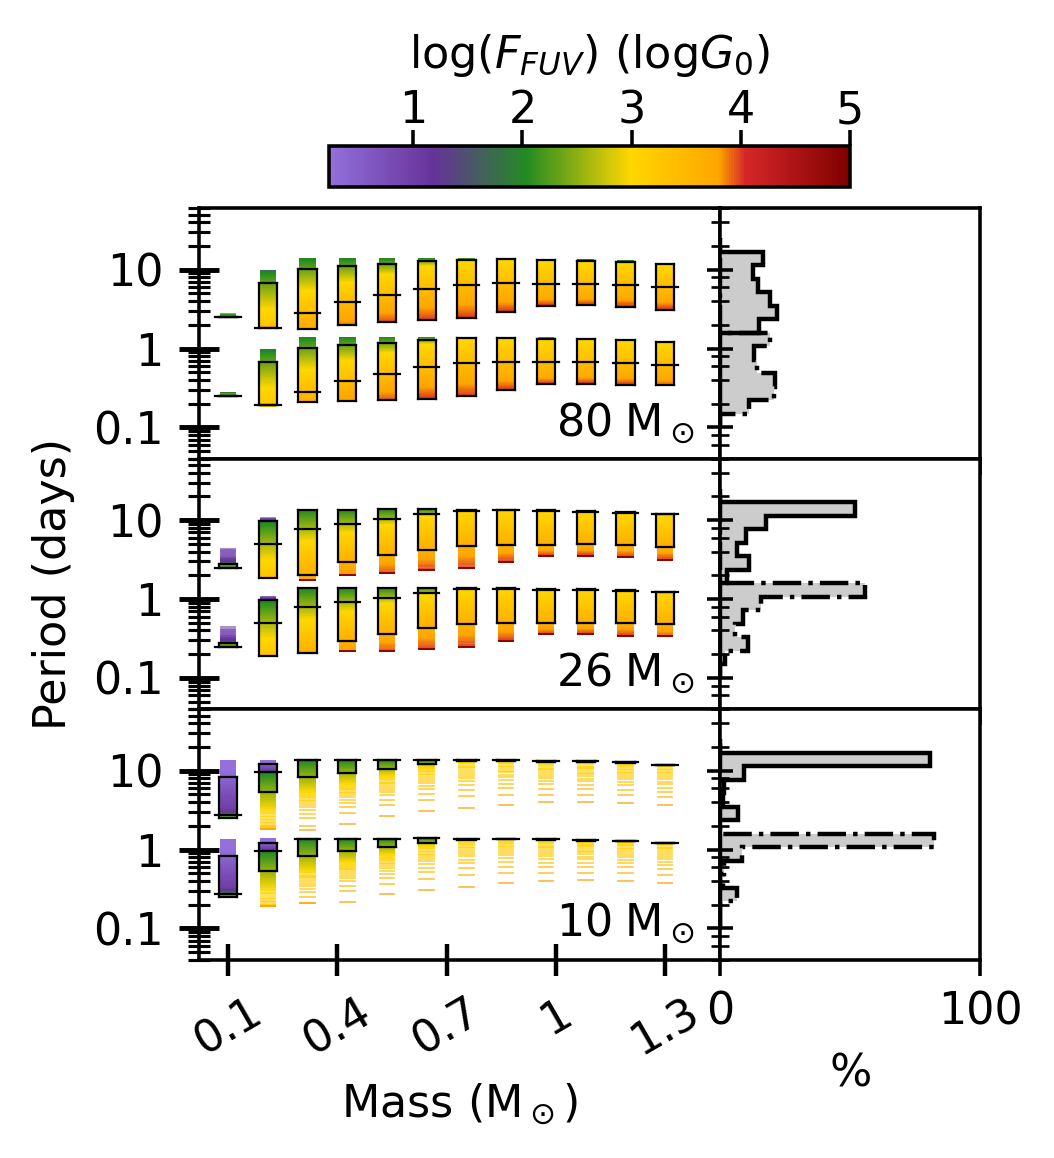

In [87]:
fig, axis = plt.subplots(figsize=(3.15, 3.5), dpi=320, sharex=True, sharey=True)
plt.subplots_adjust(left=0.175, right=0.95, bottom=0.16, top=0.98)
plt.subplots_adjust(wspace=0., hspace=0)
dim = (11, 3)
i = 0
age = 2
s = 2
fs = 10
logbin = np.logspace(np.log10(0.1), np.log10(25), 15)
axis = []
alpha = 0.7
mk = '.'
lw = 0.4
wd_ = [15./61, 15./61, 15./61]
mp = [15, 15, 15]
for i in range(3):
    axis.append(plt.subplot2grid(dim, (i*3+2, 0), colspan=2, rowspan=3))
for i in range(3):
    axis.append(plt.subplot2grid(dim, (i*3+2, 2), colspan=1, rowspan=3))
dm = 0.02    
for i in range(3):
    #    
    ax = axis[i]
    ax2 = axis[i + 3]
    ax.set_yscale("log")
    ax.set_ylim(0.04, 60)
    ax.set_xlim(0.02, 1.45)  
    ax2.set_yscale("log")    
    ax2.set_ylim(0.04, 60)
    ax2.set_xlim(0.0, 100)    
    locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), 
                                  numticks=12)
#    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([0.1, 1, 10]))     
    ax.tick_params(axis="y", which='minor', direction="inout", 
                       length=5, width=0.7)    
    ax.tick_params(axis="y", direction="inout", length=9, 
                       width=1.1)          
    ax.set_yticklabels([0.1, 1, 10], fontsize=fs)    
    ax2.yaxis.set_minor_locator(locmin)
    ax2.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax2.yaxis.set_major_locator(mpl.ticker.FixedLocator([0.1, 1, 10, 100]))     
    ax2.tick_params(axis="y", which='minor', direction="inout", length=4, 
                    width=0.6)
    ax2.tick_params(axis="y", direction="inout", length=6, width=0.8)        
    ax2.set_yticks([0.1, 1, 10])        
    ax2.set_yticklabels(['', '', ''], fontsize=fs)    
    if i != 2:
        ax.set_xticks([0.1, 1]) 
        ax.set_xticklabels(['', ''], fontsize=fs)    
        ax2.set_xticks([1, 100])        
        ax2.set_xticklabels(['', ''], fontsize=fs)        
    if i == 1: ax.set_ylabel(r'Period (days)', fontsize=fs)  
    if i>1:
        ax.tick_params(axis="x", direction="inout", length=7, width=1.,rotation=30)          
        ax.set_xticks([0.1,0.4,0.7,1.,1.3])
        ax.set_xticklabels([0.1,0.4,0.7,1,1.3],fontsize=fs)
        ax.set_xlabel(r'Mass (M$_\odot$)',fontsize=fs) 
        ax2.set_xlabel(r'$\%$',fontsize=fs)  
    ax.text(1, .08, str(int(mass[i]))+r'$\;$M$_\odot$')        
    for j in range(slow_output.shape[1]):  
        x = mass_[i, j]
        y = slow_output[i, j, :, -1]
        z = np.log10(local_FUV_[i, j])
        order = np.argsort(z) #np.arange(0, len(z)-1) #
        plot_box_plot(y, ax, mass_[i, j, 0], dm + 0.005, lw=0.5, ls='-')
        for k in range(len(x)):
            a = ax.plot([x[order][k] - dm, x[order][k] + dm], [y[order][k],
                         y[order][k]], '-', lw=lw, 
                        color=cmap(norm(z[order][k])),
                   alpha=alpha) 
    y_ = np.reshape(slow_output[i, :, :, -1], -1)                    
    weights = 100.*np.ones_like(y_) / len(y_)
    ax2.hist(y_, bins=logbin, orientation='horizontal', 
             histtype=u'stepfilled', zorder=0, color='k', alpha=0.2, 
             weights=weights) 
    ax2.hist(y_, bins=logbin, orientation='horizontal', 
             histtype=u'step', zorder=10, color='k', linestyle='-', 
             weights=weights) 
    #
    for j in range(fast_output.shape[1]):  
        x = mass_[i, j]
        y = fast_output[i, j, :, -1]
        z = np.log10(local_FUV_[i, j])
        order = np.argsort(z) #np.arange(0, len(z)-1) #
        plot_box_plot(y, ax, mass_[i, j, 0], dm + 0.005, lw=0.5, ls='-')
        for k in range(len(x)):
            a = ax.plot([x[order][k] - dm, x[order][k] + dm], [y[order][k],
                         y[order][k]], '-', lw=lw, 
                        color=cmap(norm(z[order][k])),
                   alpha=alpha)         
    y_ = np.reshape(fast_output[i, :, :, -1], -1)#, j, k] 
    weights = 100.*np.ones_like(y_) / len(y_) 
    ax2.hist(y_[np.isfinite(y_)], bins=logbin, orientation='horizontal', 
             histtype=u'stepfilled', zorder=0, color='k', linestyle='-.', 
             alpha=0.2, weights=weights)
    ax2.hist(y_[np.isfinite(y_)], bins=logbin, orientation='horizontal', 
             histtype=u'step', zorder=8, color='k', linestyle='-.', 
             weights=weights)    

ax_cb = plt.subplot2grid((44,6), (5,1), colspan=4, rowspan=2)
# 
cb=mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm, 
                             orientation="horizontal", ticks=[1, 2, 3, 4, 5])  
cb.ax.set_xlabel(r'$\log(F_{FUV})$ ($\log G_0$)', rotation=0, linespacing=5, 
                 fontsize=fs, labelpad=-35)    
ax_cb.xaxis.set_ticks_position('top')
cb.ax.set_xticklabels([1,2,3,4,5])
cb.ax.xaxis.set_tick_params(pad=-0.5)
 

plt.savefig('/Users/jroquette/work/plot/Period_mass_aroundOBstars_withhist_lower_sampling_referee.png')        